In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [59]:
df=pd.read_csv(r"/Users/jeroldmain/Downloads/heart_2020_cleaned.csv")
df.shape


(319795, 18)

In [60]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [61]:
df.duplicated().sum()

18078

In [62]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [63]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

In [65]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [66]:
# Label Encoding
object_feature = df.dtypes[df.dtypes == 'O'].index.values
L = LabelEncoder()

for i in object_feature:
    df[i] = L.fit_transform(df[i])
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int64  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  int64  
 3   AlcoholDrinking   301717 non-null  int64  
 4   Stroke            301717 non-null  int64  
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  int64  
 8   Sex               301717 non-null  int64  
 9   AgeCategory       301717 non-null  int64  
 10  Race              301717 non-null  int64  
 11  Diabetic          301717 non-null  int64  
 12  PhysicalActivity  301717 non-null  int64  
 13  GenHealth         301717 non-null  int64  
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  int64  
 16  KidneyDisease     30

In [68]:
# Dropping race column in the dataset
df = df.drop('Race', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int64  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  int64  
 3   AlcoholDrinking   301717 non-null  int64  
 4   Stroke            301717 non-null  int64  
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  int64  
 8   Sex               301717 non-null  int64  
 9   AgeCategory       301717 non-null  int64  
 10  Diabetic          301717 non-null  int64  
 11  PhysicalActivity  301717 non-null  int64  
 12  GenHealth         301717 non-null  int64  
 13  SleepTime         301717 non-null  float64
 14  Asthma            301717 non-null  int64  
 15  KidneyDisease     301717 non-null  int64  
 16  SkinCancer        30

In [69]:
df.shape

(301717, 17)

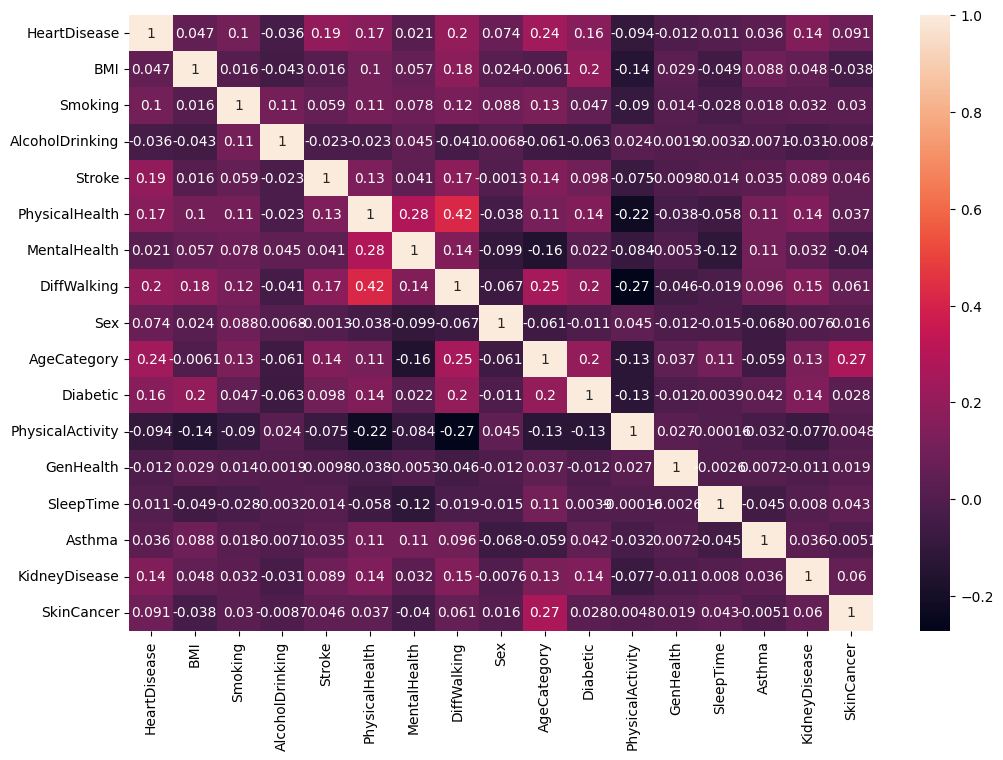

In [70]:
# Heatmap
corr = df.corr()
top_feature = corr.index
plt.subplots(figsize=(12, 8))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

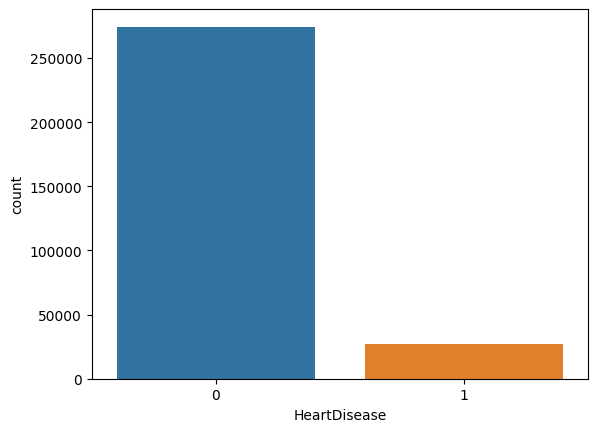

In [71]:
# Class Imbalance
sns.countplot(x='HeartDisease',data = df)

In [72]:
# UnderSampling
# count class
count_class_0, count_class_1 = df.HeartDisease.value_counts()
class_0 = df[df['HeartDisease'] == 0]
class_1 = df[df['HeartDisease'] == 1]

In [73]:
count_class_0, count_class_1

(274456, 27261)

In [74]:
class_0.shape

(274456, 17)

In [75]:
class_1.shape

(27261, 17)

In [76]:
data_us_0 = class_0.sample(count_class_1)
us_data = pd.concat([data_us_0, class_1], axis=0)
us_data.shape
print(us_data.HeartDisease.value_counts())

0    27261
1    27261
Name: HeartDisease, dtype: int64


In [77]:
# Making x,y undersampling
x = us_data.drop('HeartDisease',axis='columns')
y = us_data['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)
y_train.value_counts()

1    21809
0    21808
Name: HeartDisease, dtype: int64

Mean Square Error testing model   0.2530032095369097
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.73      0.74      5453
           1       0.74      0.77      0.75      5452

    accuracy                           0.75     10905
   macro avg       0.75      0.75      0.75     10905
weighted avg       0.75      0.75      0.75     10905

confusion matrix: 
 [[3957 1496]
 [1263 4189]]


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


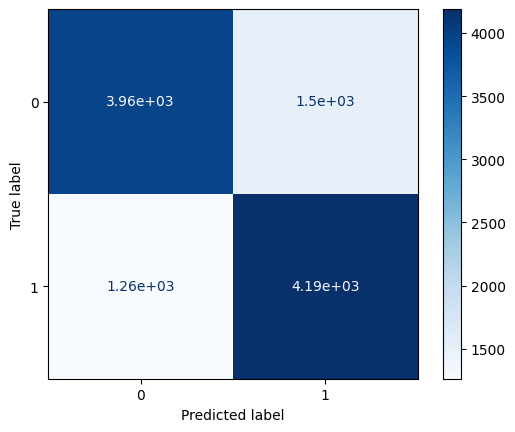

In [78]:
# Implementation of Logistic Regression
logistic =LogisticRegression() 
logistic.fit(x_train,y_train)
prediction = logistic.predict((x_test))
print('Mean Square Error testing model  ', metrics.mean_squared_error(y_test, prediction))
print("Classification Report: \n", classification_report(y_test, prediction))
print('confusion matrix: \n',confusion_matrix(y_test, prediction))
show = plot_confusion_matrix(logistic, x_test, y_test, cmap='Blues',values_format='.3g')

Mean Square Error testing model   0.2914259513984411
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.69      0.70      5453
           1       0.70      0.73      0.71      5452

    accuracy                           0.71     10905
   macro avg       0.71      0.71      0.71     10905
weighted avg       0.71      0.71      0.71     10905

confusion matrix: 
 [[3772 1681]
 [1497 3955]]


/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


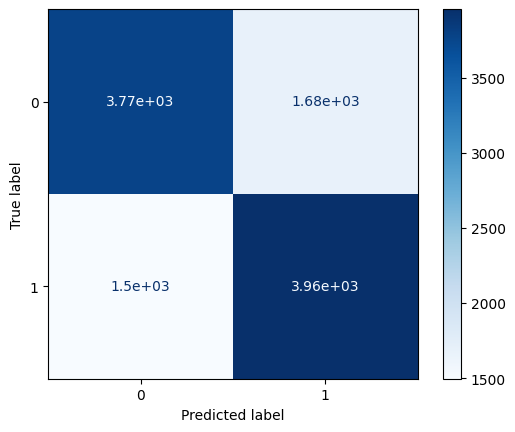

In [79]:
# Implementation of KNN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
prediction = knn.predict((x_test))
print('Mean Square Error testing model  ', metrics.mean_squared_error(y_test, prediction))
print("Classification Report: \n", classification_report(y_test, prediction))
print('confusion matrix: \n',confusion_matrix(y_test, prediction))
show = plot_confusion_matrix(knn, x_test, y_test, cmap='Blues',values_format='.3g')

Mean Square Error testing model   0.3322329206785878
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.67      0.67      5453
           1       0.67      0.66      0.67      5452

    accuracy                           0.67     10905
   macro avg       0.67      0.67      0.67     10905
weighted avg       0.67      0.67      0.67     10905

confusion matrix: 
 [[3678 1775]
 [1848 3604]]


/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


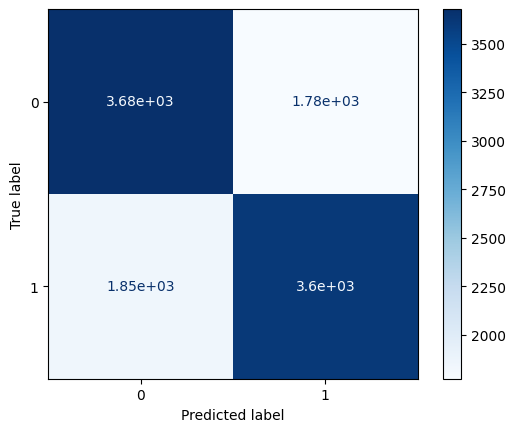

In [80]:
# Implementation of Decision Tree
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)
prediction = dt.predict((x_test))
print('Mean Square Error testing model  ', metrics.mean_squared_error(y_test, prediction))
print("Classification Report: \n", classification_report(y_test, prediction))
print('confusion matrix: \n',confusion_matrix(y_test, prediction))
show = plot_confusion_matrix(dt, x_test, y_test, cmap='Blues',values_format='.3g')

Mean Square Error testing model   0.26492434662998626
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.71      0.73      5453
           1       0.72      0.76      0.74      5452

    accuracy                           0.74     10905
   macro avg       0.74      0.74      0.73     10905
weighted avg       0.74      0.74      0.73     10905

confusion matrix: 
 [[3851 1602]
 [1287 4165]]


/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


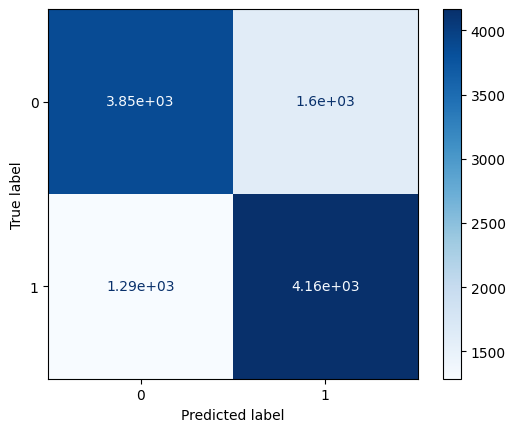

In [81]:
# Implementation of Random Forest
rf =RandomForestClassifier() 
rf.fit(x_train,y_train)
prediction = rf.predict((x_test))
print('Mean Square Error testing model  ', metrics.mean_squared_error(y_test, prediction))
print("Classification Report: \n", classification_report(y_test, prediction))
print('confusion matrix: \n',confusion_matrix(y_test, prediction))
show = plot_confusion_matrix(rf, x_test, y_test, cmap='Blues',values_format='.3g')

In [82]:
# ROC Curve Undersampling
logistic_probs = logistic.predict_proba(x_test)
knn_probs = knn.predict_proba(x_test)
dt_probs = dt.predict_proba(x_test)
rf_probs = rf.predict_proba(x_test)

logistic_probs = logistic_probs[:, 1]
knn_probs = knn_probs[:, 1]
dt_probs = dt_probs[:, 1]
rf_probs = rf_probs[:, 1]
logistic_auc = roc_auc_score(y_test, logistic_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
print('Logistic Regression: AUROC = %.3f' % (logistic_auc))
print('KNN: AUROC = %.3f' % (knn_auc))
print('Decission Tree: AUROC = %.3f' % (dt_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))


Logistic Regression: AUROC = 0.827
KNN: AUROC = 0.765
Decission Tree: AUROC = 0.669
Random Forest: AUROC = 0.805


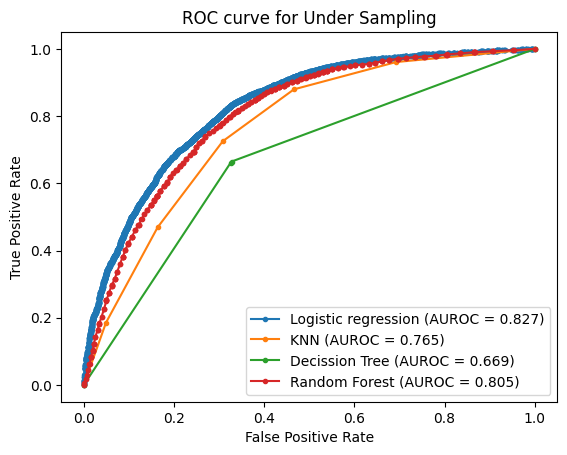

In [83]:
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic regression (AUROC = %0.3f)' % logistic_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decission Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)

plt.title('ROC curve for Under Sampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()


In [84]:
# Oversampling

data_os_1 = class_1.sample(count_class_0, replace=True)
os_data = pd.concat([data_os_1, class_0], axis=0)
os_data.shape
print(os_data.HeartDisease.value_counts())

1    274456
0    274456
Name: HeartDisease, dtype: int64


In [85]:
# making x,y oversampling
x = os_data.drop('HeartDisease',axis='columns')
y = os_data['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)
y_test.value_counts()

0    54892
1    54891
Name: HeartDisease, dtype: int64

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Mean Square Error testing model  0.2552945355838336
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.73      0.74     54892
           1       0.74      0.76      0.75     54891

    accuracy                           0.74    109783
   macro avg       0.74      0.74      0.74    109783
weighted avg       0.74      0.74      0.74    109783

confusion matrix: 
 [[40017 14875]
 [13152 41739]]


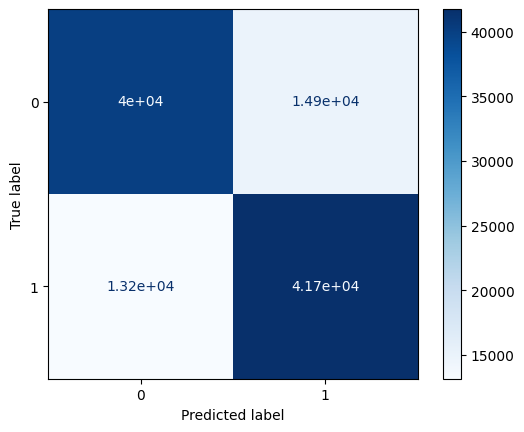

In [86]:
# Implementing Logistic Regression
logistic =LogisticRegression() 
logistic.fit(x_train,y_train)
prediction = logistic.predict((x_test))
print('Mean Square Error testing model ', metrics.mean_squared_error(y_test, prediction))
print("Classification Report: \n", classification_report(y_test, prediction))
print('confusion matrix: \n',confusion_matrix(y_test, prediction))
show = plot_confusion_matrix(logistic, x_test, y_test, cmap='Blues',values_format='.3g')

Mean Square Error testing model   0.10908792800342494
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.79      0.88     54892
           1       0.82      0.99      0.90     54891

    accuracy                           0.89    109783
   macro avg       0.91      0.89      0.89    109783
weighted avg       0.91      0.89      0.89    109783

confusion matrix: 
 [[43317 11575]
 [  401 54490]]


/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


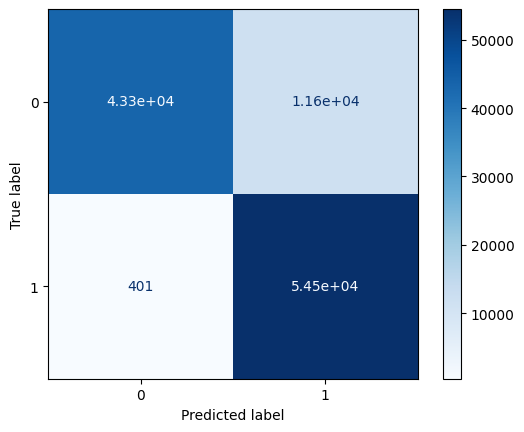

In [87]:
# Implementation of KNN 
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
prediction = knn.predict((x_test))
print('Mean Square Error testing model  ', metrics.mean_squared_error(y_test, prediction))
print("Classification Report: \n", classification_report(y_test, prediction))
print('confusion matrix: \n',confusion_matrix(y_test, prediction))
show = plot_confusion_matrix(knn, x_test, y_test, cmap='Blues',values_format='.3g')

Mean Square Error testing model   0.048322600038257287
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     54892
           1       0.91      1.00      0.95     54891

    accuracy                           0.95    109783
   macro avg       0.96      0.95      0.95    109783
weighted avg       0.96      0.95      0.95    109783

confusion matrix: 
 [[49630  5262]
 [   43 54848]]


/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


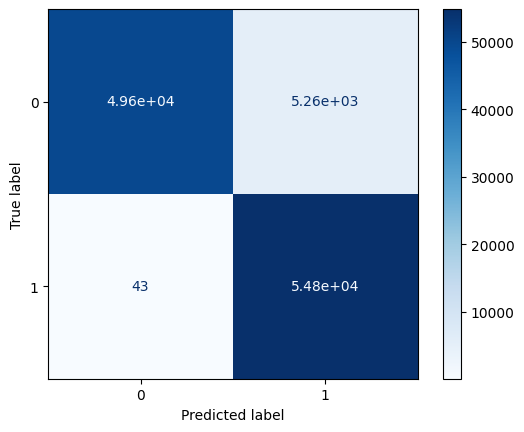

In [88]:
# Implementing Decision Tree
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)
prediction = dt.predict((x_test))
print('Mean Square Error testing model  ', metrics.mean_squared_error(y_test, prediction))
print("Classification Report: \n", classification_report(y_test, prediction))
print('confusion matrix: \n',confusion_matrix(y_test, prediction))
show = plot_confusion_matrix(dt, x_test, y_test, cmap='Blues',values_format='.3g')

Mean Square Error testing model   0.034249382873486785
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     54892
           1       0.94      1.00      0.97     54891

    accuracy                           0.97    109783
   macro avg       0.97      0.97      0.97    109783
weighted avg       0.97      0.97      0.97    109783

confusion matrix: 
 [[51174  3718]
 [   42 54849]]


/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


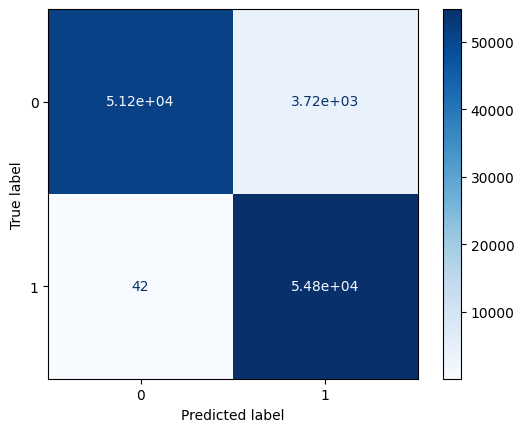

In [89]:
# Implementation of Random Forest
rf =RandomForestClassifier() 
rf.fit(x_train,y_train)
prediction = rf.predict((x_test))
print('Mean Square Error testing model  ', metrics.mean_squared_error(y_test, prediction))
print("Classification Report: \n", classification_report(y_test, prediction))
print('confusion matrix: \n',confusion_matrix(y_test, prediction))
show = plot_confusion_matrix(rf, x_test, y_test, cmap='Blues',values_format='.3g')

In [90]:
#ROC Curve Over Sampling
logistic_probs = logistic.predict_proba(x_test)
knn_probs = knn.predict_proba(x_test)
dt_probs = dt.predict_proba(x_test)
rf_probs = rf.predict_proba(x_test)

logistic_probs = logistic_probs[:, 1]
knn_probs = knn_probs[:, 1]
dt_probs = dt_probs[:, 1]
rf_probs = rf_probs[:, 1]

logistic_auc = roc_auc_score(y_test, logistic_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
print('Logistic Regression: AUROC = %.3f' % (logistic_auc))
print('KNN: AUROC = %.3f' % (knn_auc))
print('Decission Tree: AUROC = %.3f' % (dt_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))

Logistic Regression: AUROC = 0.822
KNN: AUROC = 0.951
Decission Tree: AUROC = 0.953
Random Forest: AUROC = 0.996


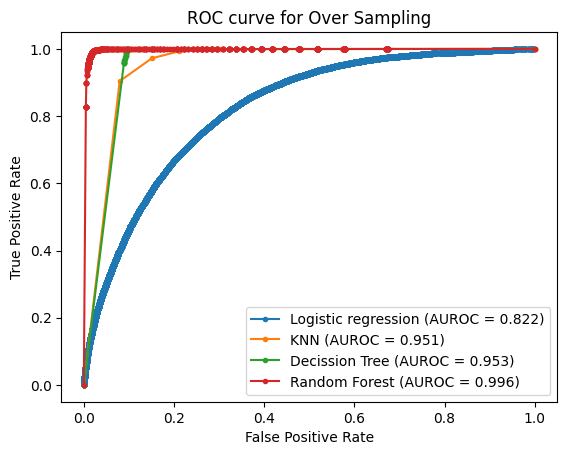

In [91]:
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic regression (AUROC = %0.3f)' % logistic_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decission Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.title('ROC curve for Over Sampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()


In [92]:
# SMOTE
x = us_data.drop('HeartDisease',axis='columns')
y = us_data['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)
y_train.value_counts()
smote = SMOTE(random_state=42)
x_sm, y_sm = smote.fit_resample(x,y)



Mean Square Error testing model   0.2511691884456671
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.74      0.75      5453
           1       0.75      0.76      0.75      5452

    accuracy                           0.75     10905
   macro avg       0.75      0.75      0.75     10905
weighted avg       0.75      0.75      0.75     10905

confusion matrix: 
 [[4045 1408]
 [1331 4121]]


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


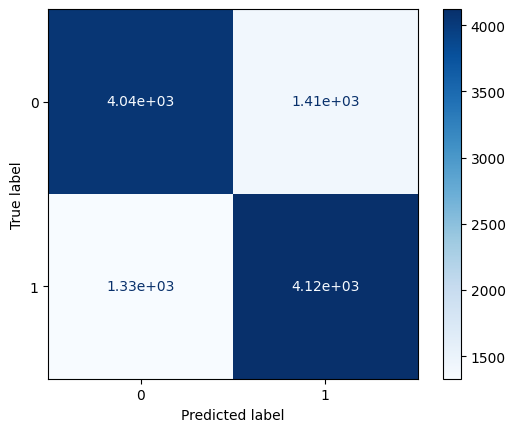

In [93]:
# Implementation of Logistic Regression
logistic =LogisticRegression() 
logistic.fit(x_sm,y_sm)
prediction = logistic.predict((x_test))
print('Mean Square Error testing model  ', metrics.mean_squared_error(y_test, prediction))
print("Classification Report: \n", classification_report(y_test, prediction))
print('confusion matrix: \n',confusion_matrix(y_test, prediction))
show = plot_confusion_matrix(logistic, x_test, y_test, cmap='Blues',values_format='.3g')

Mean Square Error testing model   0.20348464007336084
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      5453
           1       0.79      0.81      0.80      5452

    accuracy                           0.80     10905
   macro avg       0.80      0.80      0.80     10905
weighted avg       0.80      0.80      0.80     10905

confusion matrix: 
 [[4292 1161]
 [1058 4394]]


/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


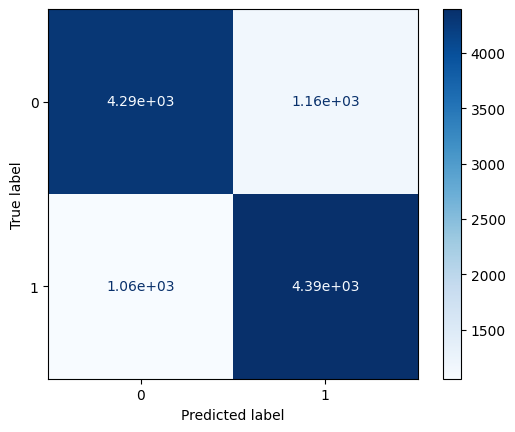

In [94]:
# Implementation of KNN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_sm, y_sm)
prediction = knn.predict((x_test))
print('Mean Square Error testing model  ', metrics.mean_squared_error(y_test, prediction))
print("Classification Report: \n", classification_report(y_test, prediction))
print('confusion matrix: \n',confusion_matrix(y_test, prediction))
show = plot_confusion_matrix(knn, x_test, y_test, cmap='Blues',values_format='.3g')

Mean Square Error testing model   0.0041265474552957355
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      5453
           1       1.00      0.99      1.00      5452

    accuracy                           1.00     10905
   macro avg       1.00      1.00      1.00     10905
weighted avg       1.00      1.00      1.00     10905

confusion matrix: 
 [[5453    0]
 [  45 5407]]


/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


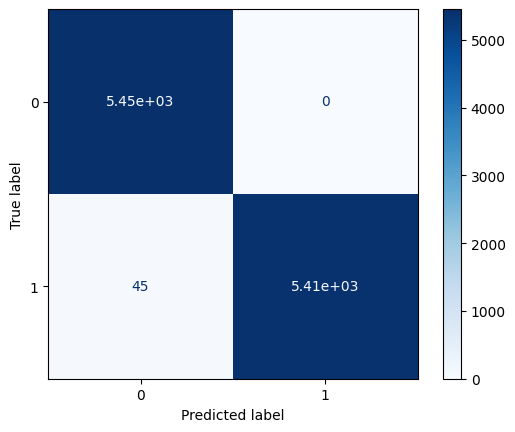

In [95]:
# Implementation of Decision Tree
dt = tree.DecisionTreeClassifier(random_state=0)
m= dt.fit(x_sm, y_sm)
prediction = dt.predict((x_test))
print('Mean Square Error testing model  ', metrics.mean_squared_error(y_test, prediction))
print("Classification Report: \n", classification_report(y_test, prediction))
print('confusion matrix: \n',confusion_matrix(y_test, prediction))
show = plot_confusion_matrix(dt, x_test, y_test, cmap='Blues',values_format='.3g')

Mean Square Error testing model   0.004218248509857863
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5453
           1       1.00      1.00      1.00      5452

    accuracy                           1.00     10905
   macro avg       1.00      1.00      1.00     10905
weighted avg       1.00      1.00      1.00     10905

confusion matrix: 
 [[5430   23]
 [  23 5429]]


/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


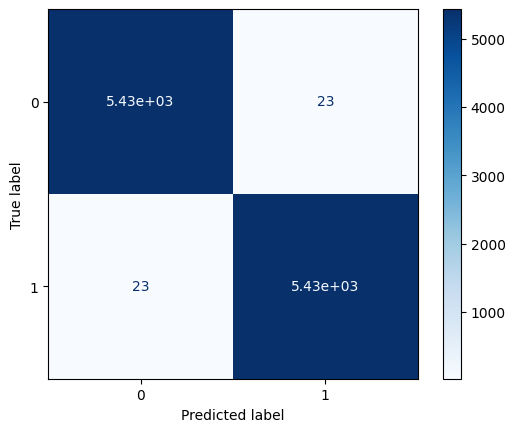

In [96]:
# Implementation of Random Forest
rf =RandomForestClassifier() 
rf.fit(x_sm,y_sm)
prediction = rf.predict((x_test))
print('Mean Square Error testing model  ', metrics.mean_squared_error(y_test, prediction))
print("Classification Report: \n", classification_report(y_test, prediction))
print('confusion matrix: \n',confusion_matrix(y_test, prediction))
show = plot_confusion_matrix(rf, x_test, y_test, cmap='Blues',values_format='.3g')

In [98]:
# AUROC Curve for SMOTE
logistic_probs = logistic.predict_proba(x_test)
knn_probs = knn.predict_proba(x_test)
dt_probs = dt.predict_proba(x_test)
rf_probs = rf.predict_proba(x_test)

logistic_probs = logistic_probs[:, 1]
knn_probs = knn_probs[:, 1]
dt_probs = dt_probs[:, 1]
rf_probs = rf_probs[:, 1]

logistic_auc = roc_auc_score(y_test, logistic_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
print('Logistic Regression: AUROC = %.3f' % (logistic_auc))
print('KNN: AUROC = %.3f' % (knn_auc))
print('Decission Tree: AUROC = %.3f' % (dt_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))

Logistic Regression: AUROC = 0.827
KNN: AUROC = 0.882
Decission Tree: AUROC = 1.000
Random Forest: AUROC = 1.000


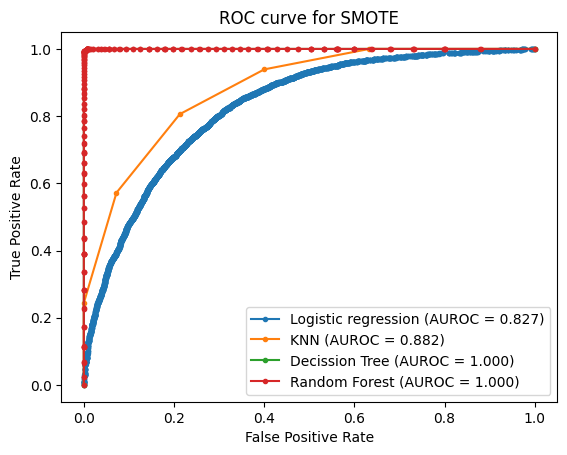

In [99]:
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic regression (AUROC = %0.3f)' % logistic_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decission Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.title('ROC curve for SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()